# ToDo

- Create environment variable for data.
- I have already created the trimmed file, but I need to re-create the code in this notebook.

What do we have
---------------

* SDSS/DR8 redmapper cluster catalog (N~400,000 central galaxies) -- redmapper_isedfit_v5.10_centrals.fits
* redmapper catalog matched to DECaLS/DR3 (N~250,000 matches) -- tractor-redmapper_isedfit_v5.10_centrals.fits


### Convenient References
* [DECaLS Documentation](http://legacysurvey.org/)
* [GitHub Repository](https://github.com/moustakas/siena-astrophysics)
* [Markdown Quick Reference Guide](https://en.support.wordpress.com/markdown-quick-reference)
* [FITS Documentation](http://docs.astropy.org/en/stable/io/fits/#)

In [1]:
import os
import warnings

from astropy.io import fits
import numpy as np
import mpl_toolkits
import matplotlib.pyplot as plt

import fitsio
from desitarget.targetmask import desi_mask, bgs_mask
from desiutil.plots import init_sky, plot_healpix_map, plot_grid_map, plot_sky_circles, plot_sky_binned, prepare_data

%matplotlib inline

### Define the operations to be performed in the subsequent cells.

In [2]:
# Trims data; outputs trimmed data into a fits file
CUTS = True
QAPLOTS = True

### Specify the path and the file.

In [35]:
path = '/Users/kevinnapier/research/dmhalos/'
file = 'tractor-redmapper_isedfit_v5.10_centrals.fits' # dr3data
centrals = 'redmapper_isedfit_v5.10_centrals.fits' 

In [36]:
data = fits.getdata(os.path.join(path, file))
centralsdata = fits.getdata(os.path.join(path, centrals))

In [75]:
if CUTS == True:
    cuts = np.where(data['OBJID'] == -1)
    newdata = np.delete(data, cuts[0])
    fits.writeto(os.path.join(path,'tractor_matched_centrals.fits'), newdata, overwrite=True)

In [25]:
matched = fitsio.read(os.path.join(path, 'tractor_matched_centrals.fits'))

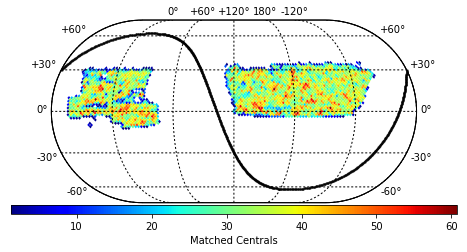

In [39]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    plt.figure(figsize=(8,4))
    basemap = init_sky(galactic_plane_color='k');
    plot_sky_binned(matched['RA'], matched['DEC'], verbose=False, clip_lo='!1', plot_type='healpix', cmap='jet', 
                label='Matched Centrals', basemap=basemap);

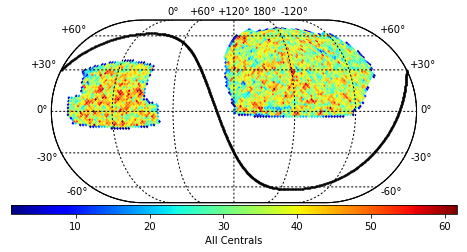

In [40]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    plt.figure(figsize=(8,4))
    basemap = init_sky(galactic_plane_color='k');
    plot_sky_binned(centralsdata['RA'], centralsdata['DEC'], verbose=False, clip_lo='!1', plot_type='healpix', cmap='jet', 
                label='All Centrals', basemap=basemap);

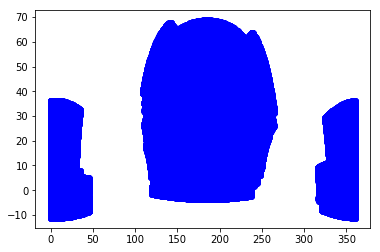

In [37]:
plt.plot(centralsdata['RA'], centralsdata['DEC'],'bo')

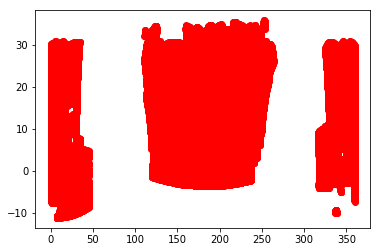

In [30]:
plt.plot(matched['RA'], matched['DEC'],'ro')